In [53]:
#options(repos='http://cran.md.tsukuba.ac.jp')
#options(repos='http://R.research.att.com/')
# install.packages('vegan')
#install.packages("corrplot")

## 0.「文書-抽出語」表を読み込む

In [54]:
d <- NULL
d <- read.table("export.csv", header=T, sep=",")

d[d$'h5'<=5000, 1] <- "A_レジャー"
d[d$'h5'>=5001 & d$'h5'<=10000, 1] <- "B_ビジネス"
d[d$'h5'<=1000, 2] <- "01_登別"
d[d$'h5'>=1001 & d$'h5'<= 2000, 2] <- "02_草津"
d[d$'h5'>=2001 & d$'h5'<= 3000, 2] <- "03_箱根"
d[d$'h5'>=3001 & d$'h5'<= 4000, 2] <- "04_道後"
d[d$'h5'>=4001 & d$'h5'<= 5000, 2] <- "05_湯布院"
d[d$'h5'>=5001 & d$'h5'<= 6000, 2] <- "06_札幌"
d[d$'h5'>=6001 & d$'h5'<= 7000, 2] <- "07_名古屋"
d[d$'h5'>=7001 & d$'h5'<= 8000, 2] <- "08_東京"
d[d$'h5'>=8001 & d$'h5'<= 9000, 2] <- "09_大阪"
d[d$'h5'>=9001 & d$'h5'<=10000, 2] <- "10_福岡"

d<-d[,c(1:2,11:ncol(d))]
names(d)[1] <- "カテゴリー"
names(d)[2] <- "エリア" 
d[1:10,1:10]

カテゴリー,エリア,部屋,ホテル,風呂,温泉,お部屋,スタッフ,立地,フロント
A_レジャー,01_登別,1,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,1,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,1,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0


## 1. 多次元尺度構成法

### (a)「抽出語-文書」表 に転置する

In [55]:
d.t <- t(d[,3:ncol(d)])
d.t[1:10,1:10]

部屋,1,0,0,0,0,0,0,0,0,0
ホテル,0,0,0,0,0,0,0,0,0,0
風呂,0,0,0,0,0,1,0,1,0,0
温泉,0,0,0,0,0,0,0,0,0,0
お部屋,0,0,0,0,0,0,0,0,0,0
スタッフ,0,0,0,0,0,0,0,0,0,0
立地,0,0,0,0,0,0,0,0,0,0
フロント,0,0,0,0,0,0,0,0,0,0
最高,0,0,0,0,0,1,0,0,0,0
浴場,0,0,0,0,0,0,0,0,0,0


### 距離を計算する (ユークリッド距離)

In [56]:
ed <- dist(d.t, method="binary")

### (b) 多次元尺度構成法で2次元プロットする

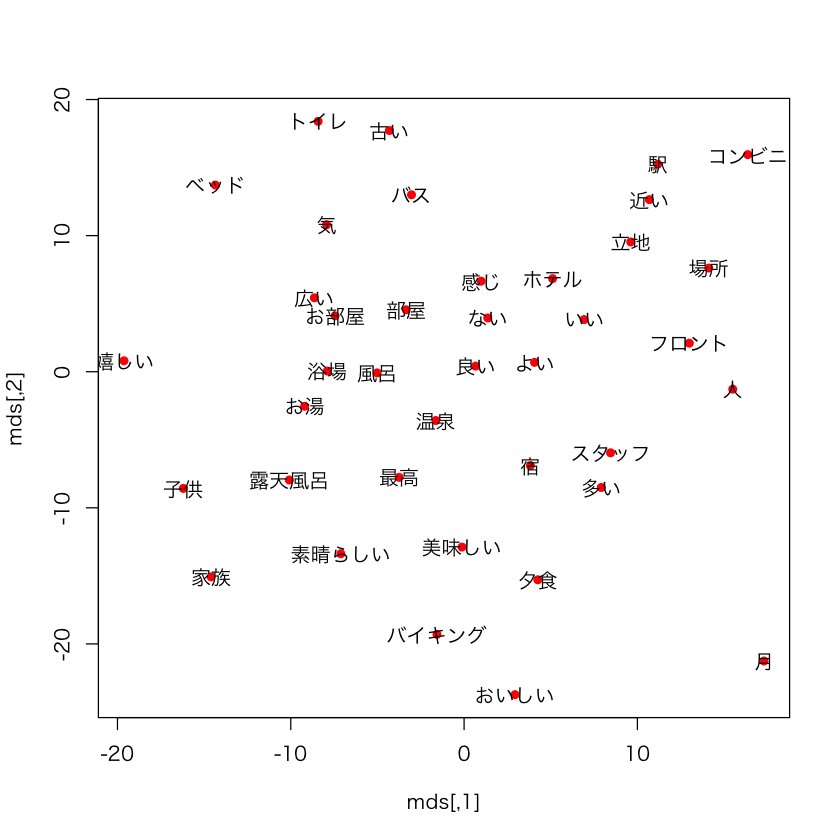

In [57]:
library("MASS")
mds <- isoMDS(ed, maxit=3000, tol=0.000001, trace=F)$points
par(family = "HiraKakuProN-W3")
plot(mds, col="red", pch=16)
text(mds, rownames(mds))

## 2. 対応分析

### (a)「抽出語-文書」表 を確認する

In [58]:
d[1:10,1:10]

カテゴリー,エリア,部屋,ホテル,風呂,温泉,お部屋,スタッフ,立地,フロント
A_レジャー,01_登別,1,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,1,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,1,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0
A_レジャー,01_登別,0,0,0,0,0,0,0,0


### (b) 対応分析で2次元プロットする

In [59]:
d0 <- aggregate(d[,3:ncol(d)], by=list(name=d$"カテゴリー"), sum)
row.names(d0) <- d0$name; d0$name <- NULL
d1 <- aggregate(d[,3:ncol(d)], by=list(name=d$"エリア"), sum)
row.names(d1) <- d1$name; d1$name <- NULL

table.N <- d0;
table.N <- rbind(table.N, d1)

In [60]:
# Observed counts
table.N[1:10,1:10]

,部屋,ホテル,風呂,温泉,お部屋,スタッフ,立地,フロント,最高,浴場
A_レジャー,2723,1157,2113,1657,1095,1014,531,436,691,518
B_ビジネス,2340,1839,668,85,419,455,812,806,222,383
01_登別,541,251,429,280,168,198,49,123,128,119
02_草津,532,290,493,469,236,173,160,81,157,95
03_箱根,621,250,476,301,283,267,65,89,130,136
04_道後,464,284,216,319,120,118,170,104,79,100
05_湯布院,565,82,499,288,288,258,87,39,197,68
06_札幌,503,351,131,24,77,95,168,161,49,95
07_名古屋,454,377,141,14,80,70,135,164,39,71
08_東京,431,350,106,2,91,98,157,151,41,83


In [61]:
library(MASS)
d_max <- min(nrow(table.N), ncol(table.N)) - 1
c <- corresp(table.N, nf=d_max)
summary(c)

       Length Class  Mode   
cor     11    -none- numeric
rscore 132    -none- numeric
cscore 429    -none- numeric
Freq   468    -none- numeric

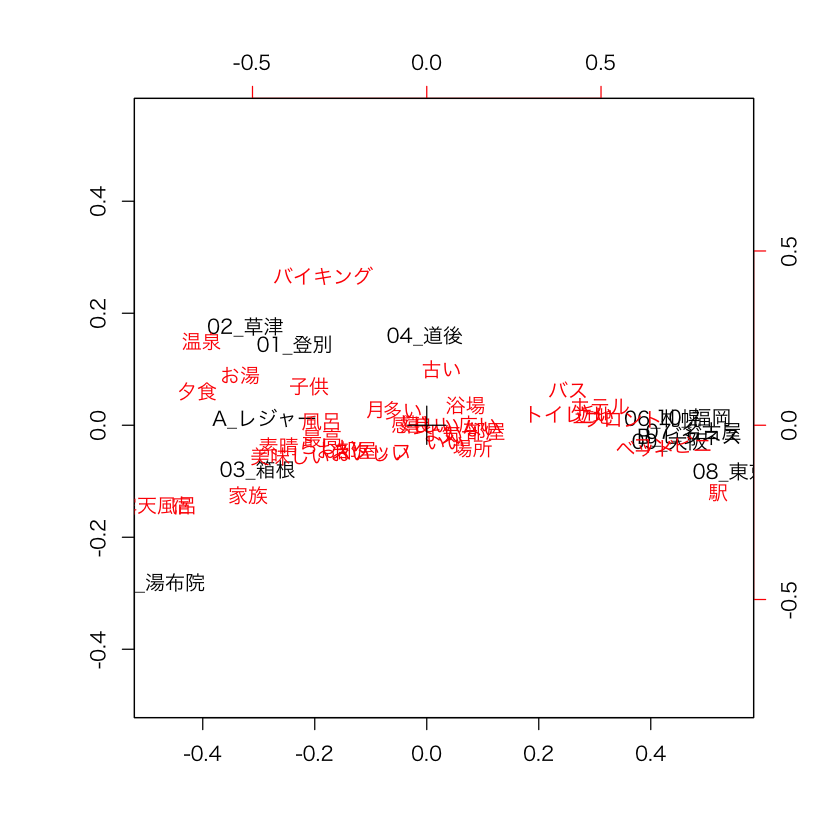

In [62]:
par(family = "HiraKakuProN-W3")
biplot(c)

### (c) 寄与率を確認する

In [63]:
# 固有値 ＝ 正準相関の2乗
k <- c$cor^2
round(k,4) 

# 寄与率 = 固有値 / 固有値の和
round(100*k / sum(k), 2)

[1] 0.1426 0.0107 0.0061 0.0022 0.0014 0.0010 0.0006 0.0006 0.0002 0.0000
[11] 0.0000

[1] 86.14  6.46  3.71  1.36  0.84  0.63  0.39  0.34  0.14  0.00  0.00

## 3. 対応分析 (手動)

In [64]:
# row sum
row.sum <- apply(table.N, 1, sum)

# col sum
col.sum <- apply(table.N, 2, sum)

# Grand total
n <- sum(table.N)

In [65]:
# Expected counts
expected <- outer(row.sum, col.sum) / sum(table.N)
round(expected, 2)[1:10, 1:10]

,部屋,ホテル,風呂,温泉,お部屋,スタッフ,立地,フロント,最高,浴場
A_レジャー,3132.00,1853.34,1720.34,1077.61,936.57,908.73,830.79,768.31,564.79,557.36
B_ビジネス,1931.00,1142.66,1060.66,664.39,577.43,560.27,512.21,473.69,348.21,343.64
01_登別,572.42,338.72,314.42,196.95,171.17,166.08,151.84,140.42,103.22,101.87
02_草津,714.88,423.03,392.67,245.97,213.77,207.42,189.63,175.37,128.91,127.22
03_箱根,710.55,420.46,390.29,244.47,212.48,206.16,188.48,174.30,128.13,126.45
04_道後,460.94,272.76,253.18,158.59,137.83,133.74,122.27,113.07,83.12,82.03
05_湯布院,673.21,398.37,369.78,231.63,201.31,195.33,178.57,165.15,121.40,119.80
06_札幌,379.81,224.75,208.62,130.68,113.58,110.20,100.75,93.17,68.49,67.59
07_名古屋,373.89,221.25,205.37,128.64,111.80,108.48,99.18,91.72,67.42,66.54
08_東京,370.40,219.18,203.45,127.44,110.76,107.47,98.25,90.86,66.79,65.92


In [66]:
# # Chi-squared test
# chisq <- chisq.test(table.N)

# #  Residuals
# residuals <- chisq$residuals
# residuals[1:10,1:10]

In [67]:
chisq <- (table.N - expected)^2/expected
round(chisq, 2)[1:10,1:10]

,部屋,ホテル,風呂,温泉,お部屋,スタッフ,立地,フロント,最高,浴場
A_レジャー,53.41,261.63,89.62,311.52,26.80,12.19,108.18,143.73,28.21,2.78
B_ビジネス,86.63,424.35,145.36,505.26,43.47,19.78,175.46,233.12,45.75,4.51
01_登別,1.72,22.72,41.76,35.02,0.06,6.13,69.65,2.16,5.95,2.88
02_草津,46.79,41.83,25.63,202.24,2.31,5.71,4.63,50.78,6.12,8.16
03_箱根,11.29,69.11,18.82,13.07,23.41,17.95,80.89,41.75,0.03,0.72
04_道後,0.02,0.46,5.46,162.25,2.31,1.85,18.64,0.73,0.20,3.94
05_湯布院,17.39,251.25,45.15,13.72,37.33,20.11,46.96,96.36,47.08,22.40
06_札幌,39.95,70.92,28.88,87.09,11.78,2.10,44.89,49.38,5.55,11.12
07_名古屋,17.16,109.65,20.18,102.17,9.05,13.65,12.94,56.96,11.98,0.30
08_東京,9.91,78.08,46.68,123.47,3.53,0.83,35.13,39.80,9.96,4.43


In [68]:
#  Residuals
residuals <- (table.N - expected)/sqrt(expected)
round(residuals, 2)[1:10,1:10]

,部屋,ホテル,風呂,温泉,お部屋,スタッフ,立地,フロント,最高,浴場
A_レジャー,-7.31,-16.17,9.47,17.65,5.18,3.49,-10.40,-11.99,5.31,-1.67
B_ビジネス,9.31,20.60,-12.06,-22.48,-6.59,-4.45,13.25,15.27,-6.76,2.12
01_登別,-1.31,-4.77,6.46,5.92,-0.24,2.48,-8.35,-1.47,2.44,1.70
02_草津,-6.84,-6.47,5.06,14.22,1.52,-2.39,-2.15,-7.13,2.47,-2.86
03_箱根,-3.36,-8.31,4.34,3.62,4.84,4.24,-8.99,-6.46,0.17,0.85
04_道後,0.14,0.68,-2.34,12.74,-1.52,-1.36,4.32,-0.85,-0.45,1.98
05_湯布院,-4.17,-15.85,6.72,3.70,6.11,4.48,-6.85,-9.82,6.86,-4.73
06_札幌,6.32,8.42,-5.37,-9.33,-3.43,-1.45,6.70,7.03,-2.36,3.33
07_名古屋,4.14,10.47,-4.49,-10.11,-3.01,-3.69,3.60,7.55,-3.46,0.55
08_東京,3.15,8.84,-6.83,-11.11,-1.88,-0.91,5.93,6.31,-3.16,2.10


In [69]:
# Standardized residuals
residuals <- residuals / sqrt(n)

# Number of dimensions
nb.axes <- min(nrow(residuals)-1, ncol(residuals)-1)

# Singular value decomposition
res.svd <- svd(residuals, nu = nb.axes, nv = nb.axes)
summary(res.svd)

  Length Class  Mode   
d  12    -none- numeric
u 132    -none- numeric
v 429    -none- numeric

In [70]:
sv <- res.svd$d[1:nb.axes] # singular value
u <-res.svd$u
v <- res.svd$v

In [71]:
# row mass
row.mass <- row.sum/n

# row coord = sv * u /sqrt(row.mass)
cc <- t(apply(u, 1, '*', sv)) # each row X sv
row.coord <- apply(cc, 2, '/', sqrt(row.mass))
rownames(row.coord) <- rownames(table.N)
colnames(row.coord) <- paste0("Dim.", 1:nb.axes)
head(round(row.coord, 3))

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11
A_レジャー,-0.289,0.012,0.001,-0.005,-0.002,0.000,-0.001,0.000,0.000,0,0
B_ビジネス,0.469,-0.019,-0.002,0.008,0.003,0.000,0.001,0.000,0.000,0,0
01_登別,-0.236,0.144,0.229,0.012,0.040,0.026,-0.035,0.006,0.009,0,0
02_草津,-0.324,0.177,-0.155,0.086,-0.005,0.020,0.012,-0.002,0.003,0,0
03_箱根,-0.302,-0.080,0.097,0.011,-0.079,-0.044,0.038,0.003,-0.007,0,0
04_道後,-0.003,0.161,-0.087,-0.183,-0.009,-0.016,-0.009,-0.009,-0.008,0,0


In [72]:
# col mass
col.mass <- col.sum/n

# coordinates sv * v /sqrt(col.mass)
cc <- t(apply(v, 1, '*', sv))
col.coord <- apply(cc, 2, '/', sqrt(col.mass))
rownames(col.coord) <- colnames(table.N)
colnames(col.coord) <- paste0("Dim", 1:nb.axes)
head(round(col.coord, 3))

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10,Dim11
部屋,0.169,-0.016,0.022,-0.018,0.027,-0.013,0.009,0.013,0.003,0,0
ホテル,0.497,0.056,-0.006,0.015,-0.001,-0.026,-0.005,0.028,-0.008,0,0
風呂,-0.301,0.011,0.037,0.032,0.014,0.009,-0.018,0.008,-0.006,0,0
温泉,-0.646,0.242,-0.090,-0.131,-0.030,0.000,-0.015,-0.020,-0.011,0,0
お部屋,-0.230,-0.072,-0.003,0.007,-0.038,0.001,0.011,0.002,0.002,0,0
スタッフ,-0.157,-0.074,0.077,-0.023,-0.012,0.009,0.014,-0.031,0.020,0,0


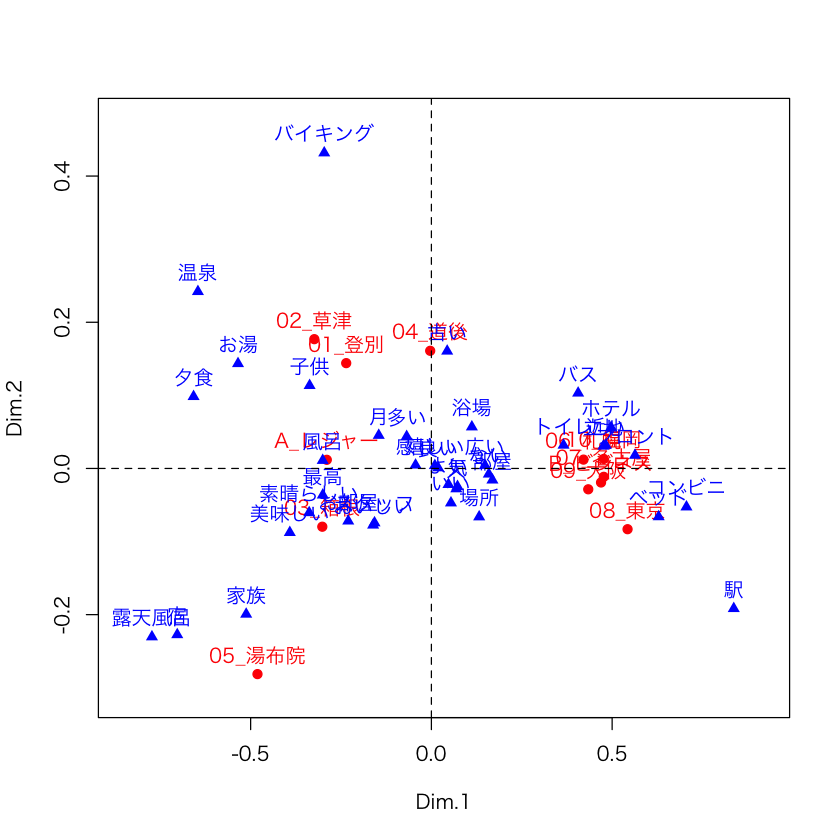

In [73]:
par(family = "HiraKakuProN-W3")

xlim <- range(c(row.coord[,1], col.coord[,1]))*1.1
ylim <- range(c(row.coord[,2], col.coord[,2]))*1.1

# Plot of rows
plot(row.coord, pch=19, col = "red", xlim = xlim, ylim = ylim)
text(row.coord, labels =rownames(row.coord), pos = 3, col ="red")

# plot off columns
points(col.coord, pch=17, col = "blue")
text(col.coord, labels =rownames(col.coord), pos = 3, col ="blue")
abline(v=0, h=0, lty = 2)

In [74]:
# 固有値
k <- res.svd$d^2
round(k,4) 

# 寄与率
round(100*k / sum(k), 2)

[1] 0.1426 0.0107 0.0061 0.0022 0.0014 0.0010 0.0006 0.0006 0.0002 0.0000
[11] 0.0000 0.0000

[1] 86.14  6.46  3.71  1.36  0.84  0.63  0.39  0.34  0.14  0.00  0.00  0.00

## 付録 (主成分分析による可視化)

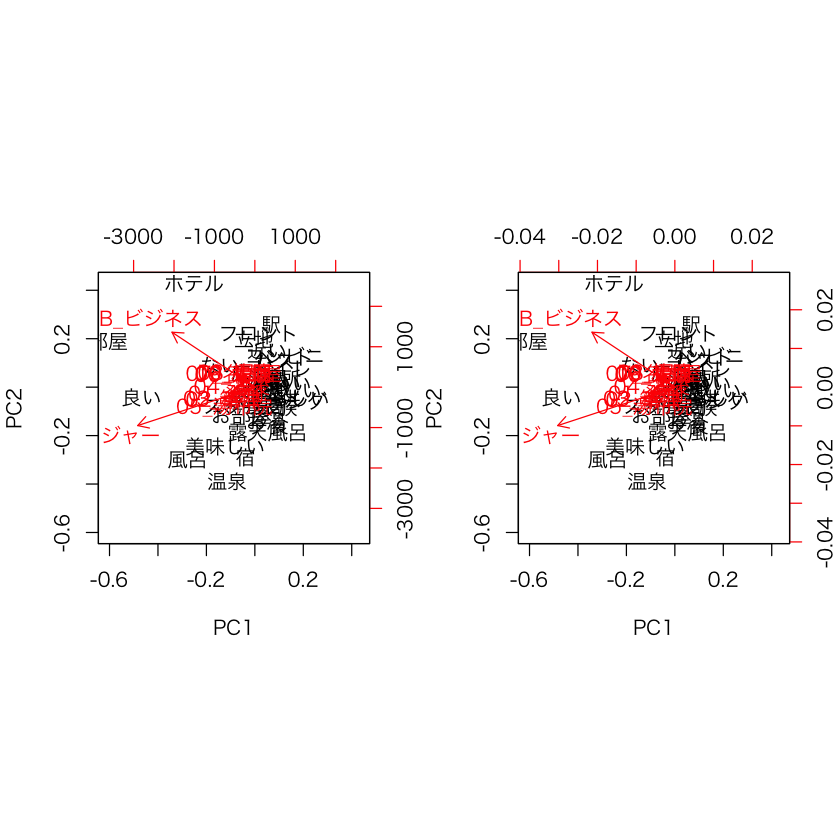

In [75]:
par(mfrow=c(1,2))
par(family = "HiraKakuProN-W3")

p1 <- prcomp(t(table.N))
biplot(p1)

table.P <- table.N / sum(table.N)
p2 <- prcomp(t(table.P))
biplot(p2)

## 付録 (対応分析の例)

In [76]:
# table.N <- matrix(
#     c(
#         395,2456,1758,
#         147,153,916,
#         694,327,1347
#     ),  byrow=T, nrow=3, ncol=3
# )

In [77]:
# colnames(table.N) <- c("強盗","詐欺","破壊")
# rownames(table.N) <- c("オスロ","中部地域","北部地域")

In [78]:
table.N <- matrix(
    c(
        3, 19, 39, 14, 10,
        1, 2, 13, 1, 12,
        6, 25, 49, 21, 29,
        3, 15, 41, 35, 26,
        10, 22, 47, 9, 26,
        3, 11, 25, 15, 34,
        1, 6, 14, 5, 11,
        0, 12, 34, 17, 23,
        2, 5, 11, 4, 7,
        2, 11, 37, 8, 20
    ),  byrow=T, nrow=10, ncol=5
)

In [79]:
colnames(table.N) <- c("A","B","C","D","E")
rownames(table.N) <- c("地質学", "生物化学", "科学", "動物学", "物理学", "工学", "微生物学", "植物学", "統計学", "数学")

In [80]:
# Observed counts
table.N

,A,B,C,D,E
地質学,3,19,39,14,10
生物化学,1,2,13,1,12
科学,6,25,49,21,29
動物学,3,15,41,35,26
物理学,10,22,47,9,26
工学,3,11,25,15,34
微生物学,1,6,14,5,11
植物学,0,12,34,17,23
統計学,2,5,11,4,7
数学,2,11,37,8,20


In [81]:
# row sum
row.sum <- apply(table.N, 1, sum)

# col sum
col.sum <- apply(table.N, 2, sum)

# Grand total
n <- sum(table.N)

In [82]:
# Expected counts
expected <- outer(row.sum, col.sum) / sum(table.N)
round(expected, 3)

,A,B,C,D,E
地質学,3.310,13.668,33.103,13.775,21.143
生物化学,1.129,4.663,11.294,4.700,7.214
科学,5.063,20.905,50.628,21.068,32.337
動物学,4.673,19.296,46.734,19.447,29.849
物理学,4.440,18.332,44.397,18.475,28.357
工学,3.427,14.151,34.271,14.261,21.889
微生物学,1.441,5.950,14.410,5.996,9.204
植物学,3.349,13.829,33.492,13.937,21.392
統計学,1.129,4.663,11.294,4.700,7.214
数学,3.038,12.543,30.377,12.641,19.402


In [83]:
#  Residuals
residuals <- (table.N - expected)/sqrt(expected)
round(residuals, 3)

,A,B,C,D,E
地質学,-0.171,1.442,1.025,0.061,-2.423
生物化学,-0.122,-1.233,0.508,-1.707,1.782
科学,0.417,0.896,-0.229,-0.015,-0.587
動物学,-0.774,-0.978,-0.839,3.527,-0.705
物理学,2.639,0.857,0.391,-2.204,-0.443
工学,-0.231,-0.838,-1.584,0.196,2.588
微生物学,-0.367,0.021,-0.108,-0.407,0.592
植物学,-1.830,-0.492,0.088,0.820,0.348
統計学,0.819,0.156,-0.087,-0.323,-0.080
数学,-0.595,-0.436,1.202,-1.305,0.136


In [84]:
# Standardized residuals
residuals <- residuals / sqrt(n)

# Number of dimensions
nb.axes <- min(nrow(residuals)-1, ncol(residuals)-1)

# Singular value decomposition
res.svd <- svd(residuals, nu = nb.axes, nv = nb.axes)
summary(res.svd)

  Length Class  Mode   
d  5     -none- numeric
u 40     -none- numeric
v 20     -none- numeric

In [85]:
sv <- res.svd$d[1:nb.axes] # singular value
u <-res.svd$u
v <- res.svd$v

In [86]:
# row mass
row.mass <- row.sum/n

# row coord = sv * u /sqrt(row.mass)
cc <- t(apply(u, 1, '*', sv)) # each row X sv
row.coord <- apply(cc, 2, '/', sqrt(row.mass))
rownames(row.coord) <- rownames(table.N)
colnames(row.coord) <- paste0("Dim.", 1:nb.axes)
head(round(row.coord, 3))

,Dim.1,Dim.2,Dim.3,Dim.4
地質学,0.076,0.303,0.088,-0.035
生物化学,0.180,-0.455,0.152,0.097
科学,0.038,0.073,-0.042,-0.044
動物学,-0.327,0.102,-0.065,0.069
物理学,0.316,0.027,-0.109,0.033
工学,-0.117,-0.292,-0.107,-0.057


In [87]:
# col mass
col.mass <- col.sum/n

# coordinates sv * v /sqrt(col.mass)
cc <- t(apply(v, 1, '*', sv))
col.coord <- apply(cc, 2, '/', sqrt(col.mass))
rownames(col.coord) <- colnames(table.N)
colnames(col.coord) <- paste0("Dim", 1:nb.axes)
head(round(col.coord, 3))

,Dim1,Dim2,Dim3,Dim4
A,0.478,0.072,-0.391,0.108
B,0.127,0.173,-0.033,-0.097
C,0.083,0.050,0.098,0.033
D,-0.390,0.139,-0.073,0.019
E,-0.032,-0.292,-0.024,-0.018


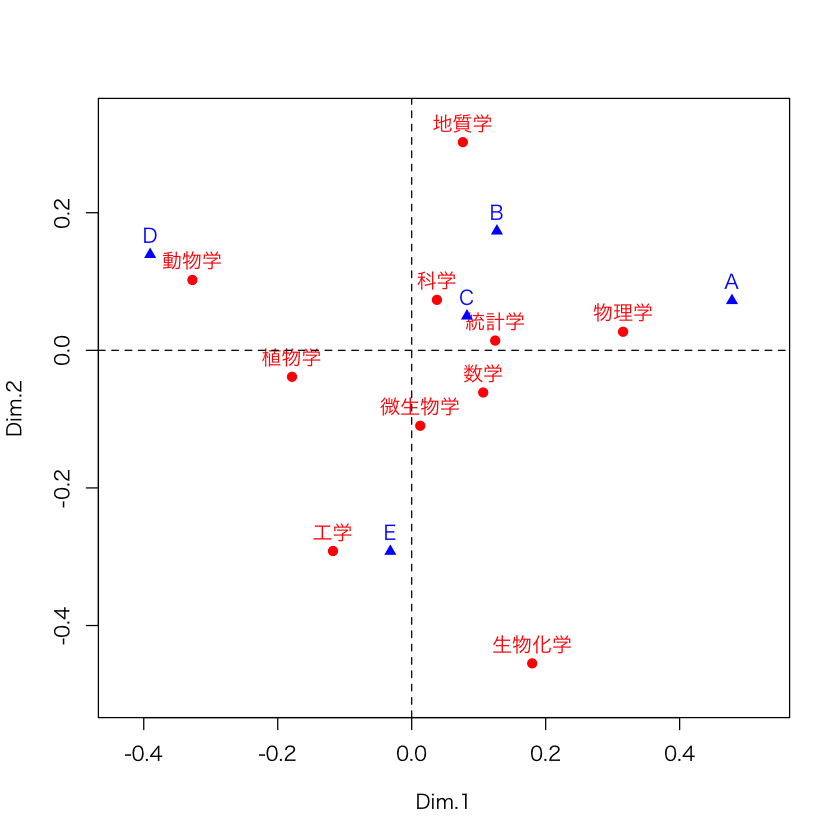

In [88]:
par(family = "HiraKakuProN-W3")

xlim <- range(c(row.coord[,1], col.coord[,1]))*1.1
ylim <- range(c(row.coord[,2], col.coord[,2]))*1.1

# Plot of rows
plot(row.coord, pch=19, col = "red", xlim = xlim, ylim = ylim)
text(row.coord, labels =rownames(row.coord), pos = 3, col ="red")

# plot off columns
points(col.coord, pch=17, col = "blue")
text(col.coord, labels =rownames(col.coord), pos = 3, col ="blue")
abline(v=0, h=0, lty = 2)

In [89]:
# 固有値
k <- res.svd$d^2
round(k,4) 

# 寄与率
round(100*k / sum(k), 2)

[1] 0.0391 0.0304 0.0109 0.0025 0.0000

[1] 47.20 36.66 13.11  3.03  0.00